In [1]:
from aisynphys.database import default_db as db 
from sqlalchemy.orm import aliased
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import numpy as np

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
cell_query = db.query(db.Cell, db.Intrinsic) \
    .join(db.Intrinsic, db.Cell.id == db.Intrinsic.cell_id).all()

In [4]:
print(len(cell_query))

15952


In [5]:
intrinsic_list=[]
bufferDict={}

In [6]:
for rec in cell_query:
    bufferDict['cell_id']=rec[0].id
    bufferDict['cre']=rec[0].cre_type
    bufferDict['rheobase']=rec[1].rheobase
    bufferDict['upstroke_downstroke']=rec[1].ap_upstroke_downstroke_ratio
    bufferDict['fi_slope']=rec[1].fi_slope
    bufferDict['Ri']=rec[1].input_resistance
    bufferDict['avg_firing_rate']=rec[1].firing_rate_40pa
    bufferDict['adaptation_index']=rec[1].adaptation_index
    bufferDict['fast_trough_deltav']=rec[1].ap_fast_trough_deltav
    bufferDict['isi_adapt_ratio']=rec[1].isi_adapt_ratio
    bufferDict['width']=rec[1].ap_width
    intrinsic_list.append(bufferDict.copy())
    bufferDict.clear()

In [7]:
print(intrinsic_list[0])

{'cell_id': 15598, 'cre': 'pvalb', 'rheobase': None, 'upstroke_downstroke': None, 'fi_slope': None, 'Ri': None, 'avg_firing_rate': None, 'adaptation_index': None, 'fast_trough_deltav': None, 'isi_adapt_ratio': None, 'width': None}


In [8]:
df = pd.DataFrame(intrinsic_list)

In [9]:
df

,cell_id,cre,rheobase,upstroke_downstroke,fi_slope,Ri,avg_firing_rate,adaptation_index,fast_trough_deltav,isi_adapt_ratio,width
0,15598,pvalb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22399,vip,1.050000e-11,2.499172,4.370158e-13,8.241018e+08,10.0,0.043472,-0.004613,5.747643,0.00172
2,17593,sst,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17594,sst,1.050000e-11,2.530336,1.174073e-12,5.692418e+08,14.0,0.164134,-0.002825,5.231417,0.00066
4,17595,nr5a1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15947,15118,unknown,NaN,NaN,NaN,3.721447e+08,NaN,NaN,NaN,NaN,NaN
15948,17462,pvalb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15949,14844,sim1,NaN,NaN,NaN,3.287490e+08,NaN,NaN,NaN,NaN,NaN
15950,14140,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
selected_columns = df[["cell_id","cre","rheobase","upstroke_downstroke","Ri","avg_firing_rate","adaptation_index","fast_trough_deltav","isi_adapt_ratio","width"]]
intrinsic_and_cre_df = selected_columns.copy()

In [11]:
intrinsic_and_cre_df

,cell_id,cre,rheobase,upstroke_downstroke,Ri,avg_firing_rate,adaptation_index,fast_trough_deltav,isi_adapt_ratio,width
0,15598,pvalb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22399,vip,1.050000e-11,2.499172,8.241018e+08,10.0,0.043472,-0.004613,5.747643,0.00172
2,17593,sst,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17594,sst,1.050000e-11,2.530336,5.692418e+08,14.0,0.164134,-0.002825,5.231417,0.00066
4,17595,nr5a1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
15947,15118,unknown,NaN,NaN,3.721447e+08,NaN,NaN,NaN,NaN,NaN
15948,17462,pvalb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15949,14844,sim1,NaN,NaN,3.287490e+08,NaN,NaN,NaN,NaN,NaN
15950,14140,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
inhib_list=['sst','vip', 'pvalb']
intrinsic_and_inhib_df=intrinsic_and_cre_df[intrinsic_and_cre_df['cre'].isin(inhib_list)]

In [13]:
intrinsic_and_inhib_df

,cell_id,cre,rheobase,upstroke_downstroke,Ri,avg_firing_rate,adaptation_index,fast_trough_deltav,isi_adapt_ratio,width
0,15598,pvalb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22399,vip,1.050000e-11,2.499172,8.241018e+08,10.0,0.043472,-0.004613,5.747643,0.00172
2,17593,sst,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17594,sst,1.050000e-11,2.530336,5.692418e+08,14.0,0.164134,-0.002825,5.231417,0.00066
6,10967,vip,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
15940,14571,sst,NaN,NaN,1.464830e+08,NaN,NaN,NaN,NaN,NaN
15941,14573,sst,NaN,NaN,2.715443e+08,NaN,NaN,NaN,NaN,NaN
15942,14581,sst,NaN,NaN,5.918288e+08,NaN,NaN,NaN,NaN,NaN
15943,14699,sst,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


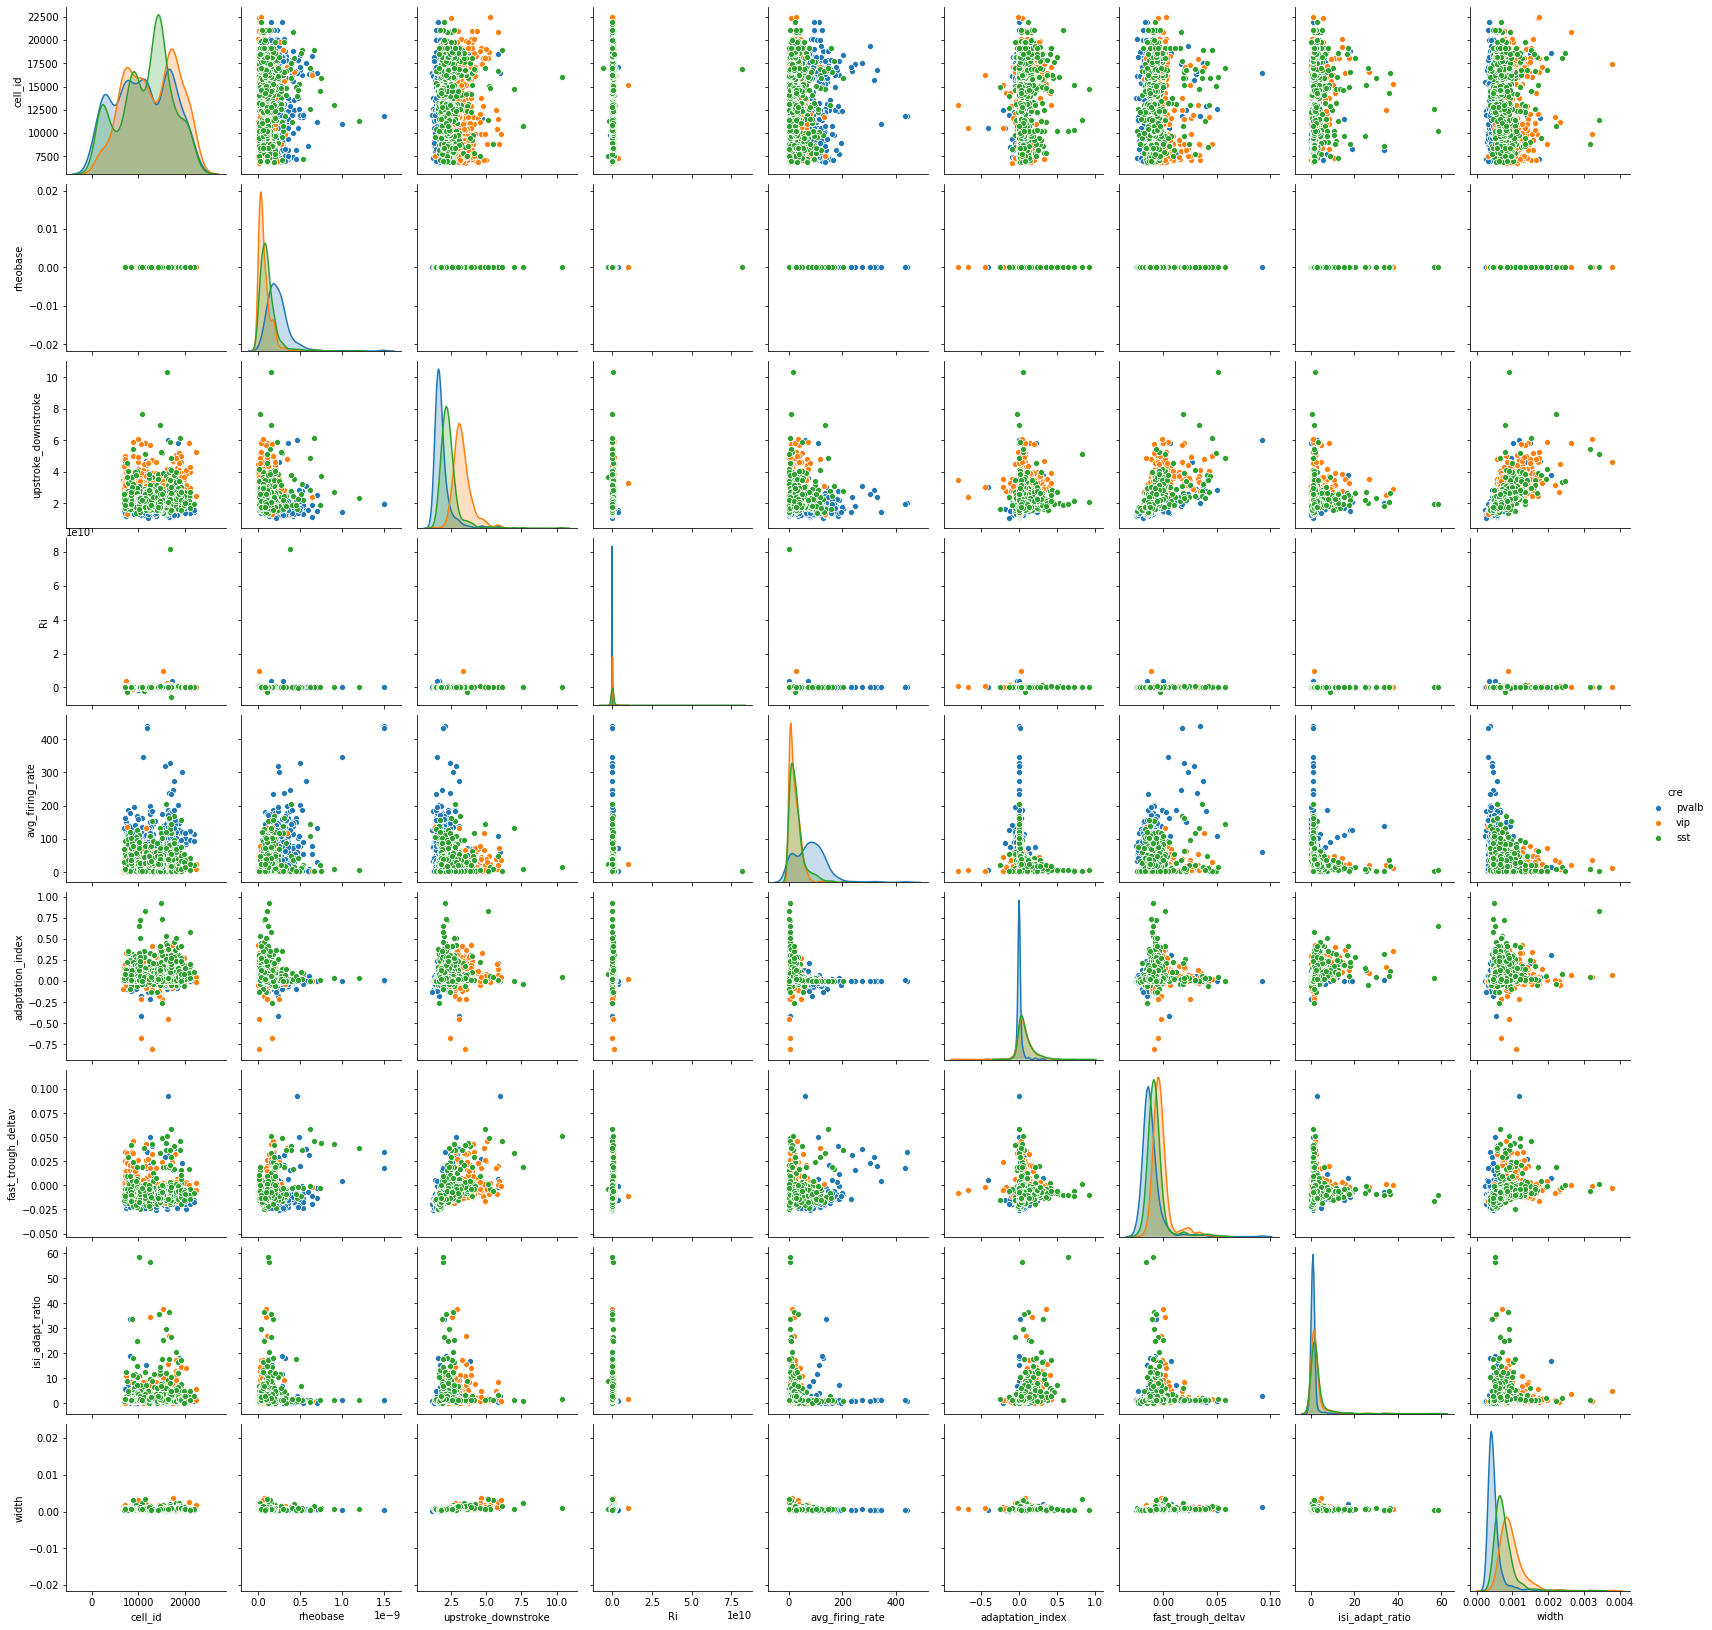

In [14]:
sns.pairplot(intrinsic_and_inhib_df, hue='cre')

In [15]:
intrinsic_and_inhib_df.isnull().sum()

cell_id                   0
cre                       0
rheobase               3504
upstroke_downstroke    3518
Ri                     2585
avg_firing_rate        3504
adaptation_index       3583
fast_trough_deltav     3519
isi_adapt_ratio        3693
width                  3519
dtype: int64

In [16]:
intrinsic_and_inhib_df.replace([np.inf, -np.inf], np.nan, inplace=True) 

C:\ProgramData\Miniconda3\envs\aisynphys\lib\site-packages\pandas\core\frame.py:4278: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [17]:
df=intrinsic_and_inhib_df.dropna(how="any")

In [18]:
df.isnull().sum()

cell_id                0
cre                    0
rheobase               0
upstroke_downstroke    0
Ri                     0
avg_firing_rate        0
adaptation_index       0
fast_trough_deltav     0
isi_adapt_ratio        0
width                  0
dtype: int64

In [19]:
import umap
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
reducer = umap.UMAP()

In [21]:
cell_data=df[
    [
        "rheobase",
        "upstroke_downstroke",
        "Ri",
        "avg_firing_rate",
        "adaptation_index",
        "fast_trough_deltav",
        "isi_adapt_ratio",
        "width",
    ]
].to_numpy()

scaled_cell_data = StandardScaler().fit_transform(cell_data)

In [22]:
cell_data

array([[ 1.04999990e-11,  2.49917214e+00,  8.24101806e+08, ...,
        -4.61250305e-03,  5.74764299e+00,  1.72000000e-03],
       [ 1.05000000e-11,  2.53033633e+00,  5.69241762e+08, ...,
        -2.82500076e-03,  5.23141655e+00,  6.60000000e-04],
       [ 1.87500012e-12,  4.07364483e+00,  1.06010878e+09, ...,
        -7.31250381e-03,  1.80228137e+00,  1.04000000e-03],
       ...,
       [ 9.45000000e-11,  1.94560336e+00,  2.72420943e+08, ...,
        -1.36312523e-02,  1.71167883e+00,  6.80000000e-04],
       [ 3.15000000e-11,  1.78606105e+00,  5.23098946e+08, ...,
        -1.28937492e-02,  2.54243743e+00,  6.40000000e-04],
       [ 8.40000000e-11,  1.76858314e+00,  1.64540306e+08, ...,
        -1.26812553e-02,  2.87486911e+00,  4.40000000e-04]])

In [23]:
embedding = reducer.fit_transform(scaled_cell_data)
embedding.shape

(1375, 2)

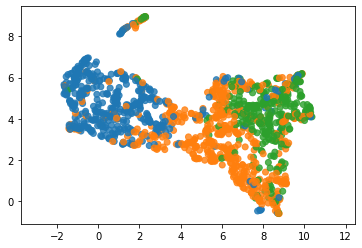

In [24]:
plt.scatter(
    embedding[:,0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df.cre.map({"pvalb":0, "sst":1, "vip":2})],
    alpha=0.8)
#    c = [x for x in df.cre.map({'pv': (0, 0, 1, 0.5), 'sst': (1, 0.3, 0, 0.5)})]
plt.gca().set_aspect('equal', 'datalim')

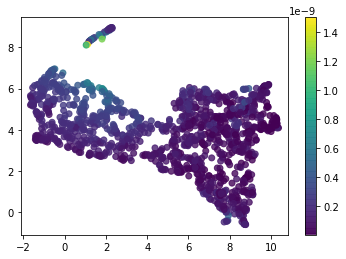

In [25]:
plt.scatter(
    embedding[:,0],
    embedding[:, 1],
    c = df.rheobase,
    alpha=0.8)
plt.colorbar()
plt.gca().set_aspect('equal', 'datalim')

Text(0.5, 1.0, 'upstroke_downstroke')

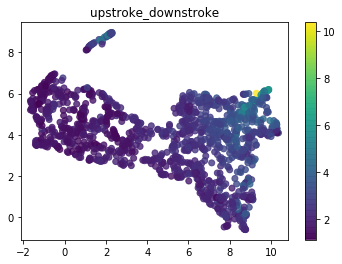

In [26]:
plt.scatter(
    embedding[:,0],
    embedding[:, 1],
    c = df.upstroke_downstroke,
    alpha=0.8)
plt.colorbar()
plt.gca().set_aspect('equal', 'datalim')
plt.title('upstroke_downstroke')

Text(0.5, 1.0, 'Ri')

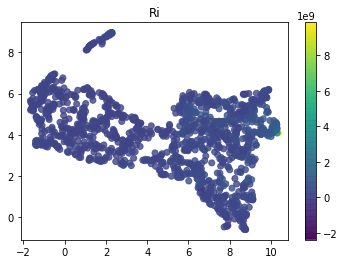

In [27]:
plt.scatter(
    embedding[:,0],
    embedding[:, 1],
    c = df.Ri,
    alpha=0.8)
plt.colorbar()
plt.gca().set_aspect('equal', 'datalim')
plt.title('Ri')

Text(0.5, 1.0, 'width')

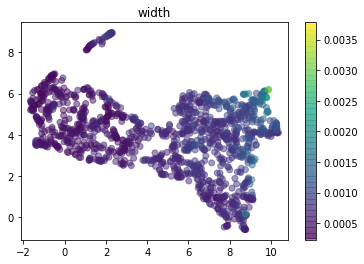

In [28]:
plt.scatter(
    embedding[:,0],
    embedding[:, 1],
    c = df.width,
    alpha=0.5)
plt.colorbar()
plt.gca().set_aspect('equal', 'datalim')
plt.title('width')

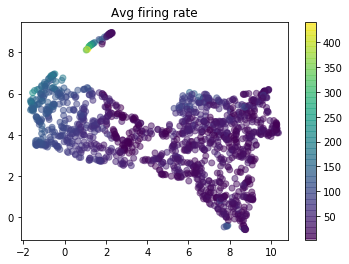

In [29]:
plt.scatter(
    embedding[:,0],
    embedding[:, 1],
    c = df.avg_firing_rate,
    alpha=0.5)
plt.colorbar()
plt.title('Avg firing rate')
plt.gca().set_aspect('equal', 'datalim')

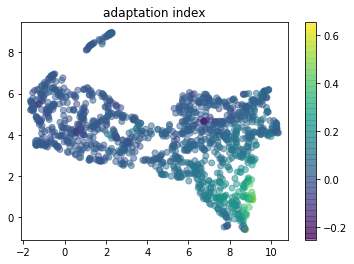

In [30]:
plt.scatter(
    embedding[:,0],
    embedding[:, 1],
    c = df.adaptation_index,
    alpha=0.5)
plt.colorbar()
plt.title('adaptation index')
plt.gca().set_aspect('equal', 'datalim')


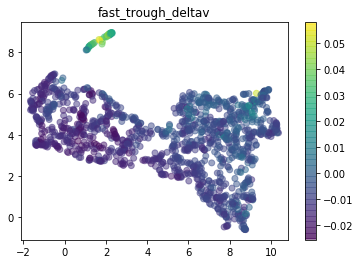

In [31]:
plt.scatter(
    embedding[:,0],
    embedding[:, 1],
    c = df.fast_trough_deltav,
    alpha=0.5)
plt.colorbar()
plt.title('fast_trough_deltav')
plt.gca().set_aspect('equal', 'datalim')

In [32]:
#okay, let's see where sst-cre cells in sst>>sst connections 'live' in the intrinsic uMAP
# first, let's merge the umap results into the intrinsic data frame
#let's move the embedding results into the data frame
#step one, make a data frame out of the umap results np array
column_names = ['umap_x', 'umap_y']
umap_df = pd.DataFrame(data = embedding, index = df.index, columns = column_names)

In [33]:
umap_df

,umap_x,umap_y
1,9.785707,5.065749
3,7.542996,1.688422
12,10.248030,4.600727
33,8.670056,-0.145018
44,5.229807,4.171790
...,...,...
15875,9.085637,0.967330
15876,4.389282,2.817807
15906,4.235529,2.748130
15907,6.495953,1.602001


In [34]:
merged_df = umap_df.join(df)

In [35]:
merged_df

,umap_x,umap_y,cell_id,cre,rheobase,upstroke_downstroke,Ri,avg_firing_rate,adaptation_index,fast_trough_deltav,isi_adapt_ratio,width
1,9.785707,5.065749,22399,vip,1.050000e-11,2.499172,8.241018e+08,10.0,0.043472,-0.004613,5.747643,0.00172
3,7.542996,1.688422,17594,sst,1.050000e-11,2.530336,5.692418e+08,14.0,0.164134,-0.002825,5.231417,0.00066
12,10.248030,4.600727,7119,vip,1.875000e-12,4.073645,1.060109e+09,2.0,0.023226,-0.007313,1.802281,0.00104
33,8.670056,-0.145018,18035,sst,1.260000e-10,2.645537,1.552458e+08,14.0,0.284093,-0.004081,20.353183,0.00070
44,5.229807,4.171790,11410,pvalb,1.600000e-10,2.601770,1.905052e+08,52.0,-0.014146,-0.004244,0.514763,0.00054
...,...,...,...,...,...,...,...,...,...,...,...,...
15875,9.085637,0.967330,14537,sst,2.937500e-11,2.168085,5.985788e+08,18.0,0.420069,-0.005888,2.769430,0.00084
15876,4.389282,2.817807,16274,sst,7.350000e-11,2.111918,5.067832e+07,40.0,0.039105,-0.014019,1.659805,0.00068
15906,4.235529,2.748130,14576,sst,9.450000e-11,1.945603,2.724209e+08,40.0,0.022556,-0.013631,1.711679,0.00068
15907,6.495953,1.602001,14667,sst,3.150000e-11,1.786061,5.230989e+08,26.0,0.125631,-0.012894,2.542437,0.00064


In [36]:
merged_df["cre_type_sst_syn"] = merged_df.cre #append cre_type_sst_syn column and fill it with a copy of the cre column

In [37]:
merged_df["syn_id"] = np.nan

In [38]:
merged_df

,umap_x,umap_y,cell_id,cre,rheobase,upstroke_downstroke,Ri,avg_firing_rate,adaptation_index,fast_trough_deltav,isi_adapt_ratio,width,cre_type_sst_syn,syn_id
1,9.785707,5.065749,22399,vip,1.050000e-11,2.499172,8.241018e+08,10.0,0.043472,-0.004613,5.747643,0.00172,vip,NaN
3,7.542996,1.688422,17594,sst,1.050000e-11,2.530336,5.692418e+08,14.0,0.164134,-0.002825,5.231417,0.00066,sst,NaN
12,10.248030,4.600727,7119,vip,1.875000e-12,4.073645,1.060109e+09,2.0,0.023226,-0.007313,1.802281,0.00104,vip,NaN
33,8.670056,-0.145018,18035,sst,1.260000e-10,2.645537,1.552458e+08,14.0,0.284093,-0.004081,20.353183,0.00070,sst,NaN
44,5.229807,4.171790,11410,pvalb,1.600000e-10,2.601770,1.905052e+08,52.0,-0.014146,-0.004244,0.514763,0.00054,pvalb,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15875,9.085637,0.967330,14537,sst,2.937500e-11,2.168085,5.985788e+08,18.0,0.420069,-0.005888,2.769430,0.00084,sst,NaN
15876,4.389282,2.817807,16274,sst,7.350000e-11,2.111918,5.067832e+07,40.0,0.039105,-0.014019,1.659805,0.00068,sst,NaN
15906,4.235529,2.748130,14576,sst,9.450000e-11,1.945603,2.724209e+08,40.0,0.022556,-0.013631,1.711679,0.00068,sst,NaN
15907,6.495953,1.602001,14667,sst,3.150000e-11,1.786061,5.230989e+08,26.0,0.125631,-0.012894,2.542437,0.00064,sst,NaN


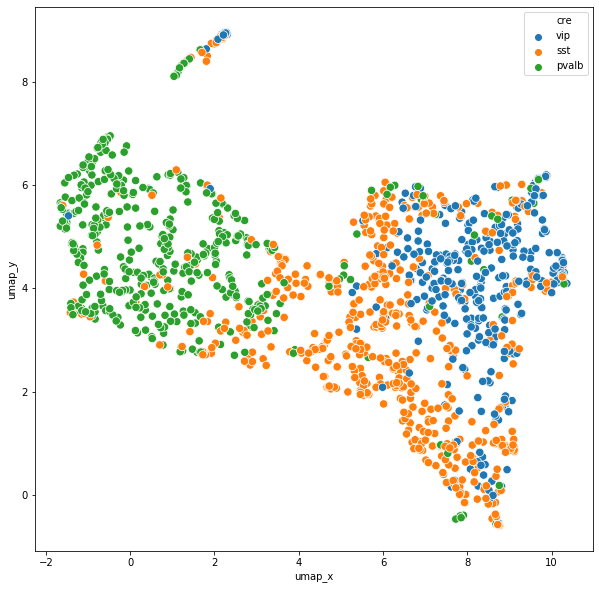

In [39]:
plt.figure(figsize=(10,10))
sns.scatterplot(merged_df.umap_x, merged_df.umap_y, hue = merged_df.cre, s=70)

In [43]:
#DB query to figure out pre and post Cell IDs for cells in sst-sst connections
from aisynphys.cell_class import CellClass
projects = ['mouse V1 coarse matrix', 'mouse V1 pre-production']
sst_class = CellClass(cre_type='sst', name='sst')
pair_query = db.pair_query(pre_class=sst_class, post_class=sst_class, project_name=projects, preload='cortical_location', synapse=True)
sstQuery = pair_query.dataframe()

In [44]:
sstQuery.head()
list(sstQuery.columns)

['id',
 'experiment_id',
 'pre_cell_id',
 'post_cell_id',
 'has_synapse',
 'has_polysynapse',
 'has_electrical',
 'crosstalk_artifact',
 'n_ex_test_spikes',
 'n_in_test_spikes',
 'distance',
 'lateral_distance',
 'vertical_distance',
 'reciprocal_id',
 'meta']

In [45]:
sstQuery.rename(columns = {'id':'id_'}, inplace = True)
# sstQuery.rename(columns = {'experiment_id':'experiment_id_'}, inplace = True) 
# sstQuery.rename(columns = {'pre_cell_id':'pre_cell_id_'}, inplace = True) 
# sstQuery.rename(columns = {'post_cell_id':'post_cell_id_'}, inplace = True) 



In [46]:
sstQuery.head()

,id_,experiment_id,pre_cell_id,post_cell_id,has_synapse,has_polysynapse,has_electrical,crosstalk_artifact,n_ex_test_spikes,n_in_test_spikes,distance,lateral_distance,vertical_distance,reciprocal_id,meta
0,56015,1642,9742,9745,True,False,False,None,264,240,0.000105,NaN,NaN,56037,None
1,56015,1642,9742,9745,True,False,False,None,264,240,0.000105,NaN,NaN,56037,None
2,49538,1454,8598,8602,True,False,False,None,649,649,0.000158,0.000132,0.000053,49564,None
3,49538,1454,8598,8602,True,False,False,None,649,649,0.000158,0.000132,0.000053,49564,None
4,50034,1466,8681,8683,True,False,False,None,781,781,0.000054,0.000043,0.000024,50043,None


In [47]:
print('number of sst-cre >> sst-cre synapses in data set:',len(sstQuery))

number of sst-cre >> sst-cre synapses in data set: 98


In [48]:
#sstQuery.hist(column='experiment_id',bins=200)
#sstQuery.duplicated(['experiment_id']).sum()
# series = sstQuery['experiment_id']
# print(series)
# sstQuery['experiment_id_'].value_counts()
sstQuery = sstQuery.loc[:,~sstQuery.columns.duplicated()]#remove duplicate columns from query
# df=sstQuery.iloc[0:,1]
# sstQuery.head()
# sstQuery.iloc[0:,1].apply(pd.Series.value_counts)
# sstQuery['experiment_id_'].apply(pd.Series.value_counts)


In [49]:
sstQuery['experiment_id'].value_counts() # count the number of times each experiment id shows up in sstQuery; this tells us the number of sst>>sst connections in each experiment

472     6
2148    4
2926    4
2247    4
2135    4
1458    4
1454    4
1148    2
1466    2
3008    2
1462    2
1329    2
1452    2
1730    2
2094    2
543     2
1438    2
3100    2
1947    2
1429    2
1645    2
1648    2
1658    2
1344    2
2244    2
2925    2
2800    2
2141    2
1261    2
2923    2
363     2
1642    2
3370    1
373     1
303     1
2931    1
3182    1
2664    1
357     1
1256    1
1453    1
815     1
607     1
2152    1
3411    1
1464    1
1133    1
570     1
2239    1
1801    1
Name: experiment_id, dtype: int64

In [50]:
# replace cre label with cre plus pre or post for sst cells in an sst>>sst connection
#this does not handle cells that are both pre and post for multipe sst>>sst connections
for pre_cell_id in sstQuery.pre_cell_id:
    for index, cell_id in zip(merged_df.index, merged_df.cell_id):
        if pre_cell_id == cell_id:
            merged_df.at[index , 'cre_type_sst_syn'] +=' sst_pre'
for post_cell_id in sstQuery.post_cell_id:
    for index, cell_id in zip(merged_df.index, merged_df.cell_id):
        if post_cell_id == cell_id:
            merged_df.at[index , 'cre_type_sst_syn'] += ' sst_post'

In [51]:
#add the synapse id to the data frame
for index0, row in sstQuery.iterrows():    
    for index, cell_id in zip(merged_df.index, merged_df.cell_id):
        if row[2] == cell_id or row[3] == cell_id:
            merged_df.at[index, 'syn_id'] = row[0]
#            print('yas', row[0], index)

In [52]:
merged_df

,umap_x,umap_y,cell_id,cre,rheobase,upstroke_downstroke,Ri,avg_firing_rate,adaptation_index,fast_trough_deltav,isi_adapt_ratio,width,cre_type_sst_syn,syn_id
1,9.785707,5.065749,22399,vip,1.050000e-11,2.499172,8.241018e+08,10.0,0.043472,-0.004613,5.747643,0.00172,vip,NaN
3,7.542996,1.688422,17594,sst,1.050000e-11,2.530336,5.692418e+08,14.0,0.164134,-0.002825,5.231417,0.00066,sst,NaN
12,10.248030,4.600727,7119,vip,1.875000e-12,4.073645,1.060109e+09,2.0,0.023226,-0.007313,1.802281,0.00104,vip,NaN
33,8.670056,-0.145018,18035,sst,1.260000e-10,2.645537,1.552458e+08,14.0,0.284093,-0.004081,20.353183,0.00070,sst,NaN
44,5.229807,4.171790,11410,pvalb,1.600000e-10,2.601770,1.905052e+08,52.0,-0.014146,-0.004244,0.514763,0.00054,pvalb,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15875,9.085637,0.967330,14537,sst,2.937500e-11,2.168085,5.985788e+08,18.0,0.420069,-0.005888,2.769430,0.00084,sst,NaN
15876,4.389282,2.817807,16274,sst,7.350000e-11,2.111918,5.067832e+07,40.0,0.039105,-0.014019,1.659805,0.00068,sst,NaN
15906,4.235529,2.748130,14576,sst,9.450000e-11,1.945603,2.724209e+08,40.0,0.022556,-0.013631,1.711679,0.00068,sst,NaN
15907,6.495953,1.602001,14667,sst,3.150000e-11,1.786061,5.230989e+08,26.0,0.125631,-0.012894,2.542437,0.00064,sst,NaN


In [53]:
#let's make a dictionary that holds basic synapses information for sst>>sst connections where the cells also have intrinsic data
sst_cells_in_sst_to_sst_conn = []
dict_from_row = {}
for index, row in merged_df.iterrows():
    if np.isnan(merged_df.at[index, 'syn_id']) == False:
#         print('yah',merged_df.at[index, 'syn_id'], merged_df.at[index, 'umap_x'])
        dict_from_row=dict(row = index, syn_id = merged_df.at[index, 'syn_id'], cell_id = merged_df.at[index, 'cell_id'], umap_x =  merged_df.at[index, 'umap_x'], umap_y =  merged_df.at[index, 'umap_y'])
        sst_cells_in_sst_to_sst_conn.append(dict_from_row.copy())
print(len(sst_cells_in_sst_to_sst_conn))

52


In [54]:
#let's find the sst-cre>>sst-cre connections that are also sst-eType>>sst-eType
threshold = 3.9
pairs_where_both_cells_are_sst_etype = 0
all_sst_cre_connections = 0
pv_e_type_to_pv_e_type = 0
listOfXvalues=[]
listOfYvalues=[]
listOfEvaluatedSynapes=[]
for cell_ref in sst_cells_in_sst_to_sst_conn:
    if cell_ref['syn_id'] not in listOfEvaluatedSynapes:
        for cell_test in sst_cells_in_sst_to_sst_conn:
            if cell_ref['syn_id'] == cell_test['syn_id'] and cell_ref['cell_id']  != cell_test['cell_id']:
                if cell_ref['umap_x'] >= threshold and cell_test['umap_x'] >= threshold:
                    pairs_where_both_cells_are_sst_etype+=1
                    all_sst_cre_connections += 1
                    listOfXvalues.append(cell_ref['umap_x'])
                    listOfXvalues.append(cell_test['umap_x'])
                    listOfYvalues.append(cell_ref['umap_y'])
                    listOfYvalues.append(cell_test['umap_y'])
                elif cell_ref['umap_x'] <= threshold and cell_test['umap_x'] <= threshold:
                    pv_e_type_to_pv_e_type+=1
                    all_sst_cre_connections += 1
                else:
                    all_sst_cre_connections += 1
        listOfEvaluatedSynapes.append(cell_ref['syn_id'])

print('number of sst_cre to sst_cre connections:', all_sst_cre_connections)
print('number of sst_etype to sst_etype connections:', pairs_where_both_cells_are_sst_etype)
print('number of pv_etype to pv_etype connections:', pv_e_type_to_pv_e_type)


number of sst_cre to sst_cre connections: 16
number of sst_etype to sst_etype connections: 9
number of pv_etype to pv_etype connections: 1


In [55]:
print(listOfEvaluatedSynapes)

[70735.0, 95023.0, 92513.0, 49122.0, 45357.0, 92358.0, 56015.0, 49464.0, 106325.0, 50034.0, 92299.0, 49942.0, 97844.0, 56154.0, 49969.0, 56218.0, 71120.0, 71020.0, 70833.0, 92364.0, 92320.0, 88830.0, 105393.0, 100195.0, 49798.0, 73794.0, 73732.0, 43618.0, 40594.0, 45748.0, 49571.0, 48837.0, 58842.0, 43725.0, 56475.0, 69795.0]


In [56]:
# let's copy the syn id into the merged df
for id_ in sstQuery.id_:
    for index, cell_id in zip(merged_df.index, merged_df.cell_id):
        if id_ == cell_id:
            merged_df.at[index , 'synID'] = id_

In [57]:
print(listOfXvalues)
print(listOfYvalues)

[6.69173, 5.9183817, 6.9961743, 4.929916, 6.058243, 6.001707, 6.1990786, 8.164519, 8.773049, 6.300936, 4.067655, 6.013389, 7.0336323, 6.7024403, 4.772873, 5.7249956, 5.671662, 5.577903]
[1.0199875, 4.273674, 1.7776903, 3.9310737, 4.2218575, 4.3204374, 3.509661, 0.25397524, -0.59362847, 2.1607108, 2.750339, 3.482375, 1.1756041, 1.7100341, 3.935068, 4.6254206, 5.386124, 4.431382]


In [58]:
merged_df

,umap_x,umap_y,cell_id,cre,rheobase,upstroke_downstroke,Ri,avg_firing_rate,adaptation_index,fast_trough_deltav,isi_adapt_ratio,width,cre_type_sst_syn,syn_id,synID
1,9.785707,5.065749,22399,vip,1.050000e-11,2.499172,8.241018e+08,10.0,0.043472,-0.004613,5.747643,0.00172,vip,NaN,NaN
3,7.542996,1.688422,17594,sst,1.050000e-11,2.530336,5.692418e+08,14.0,0.164134,-0.002825,5.231417,0.00066,sst,NaN,NaN
12,10.248030,4.600727,7119,vip,1.875000e-12,4.073645,1.060109e+09,2.0,0.023226,-0.007313,1.802281,0.00104,vip,NaN,NaN
33,8.670056,-0.145018,18035,sst,1.260000e-10,2.645537,1.552458e+08,14.0,0.284093,-0.004081,20.353183,0.00070,sst,NaN,NaN
44,5.229807,4.171790,11410,pvalb,1.600000e-10,2.601770,1.905052e+08,52.0,-0.014146,-0.004244,0.514763,0.00054,pvalb,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15875,9.085637,0.967330,14537,sst,2.937500e-11,2.168085,5.985788e+08,18.0,0.420069,-0.005888,2.769430,0.00084,sst,NaN,NaN
15876,4.389282,2.817807,16274,sst,7.350000e-11,2.111918,5.067832e+07,40.0,0.039105,-0.014019,1.659805,0.00068,sst,NaN,NaN
15906,4.235529,2.748130,14576,sst,9.450000e-11,1.945603,2.724209e+08,40.0,0.022556,-0.013631,1.711679,0.00068,sst,NaN,NaN
15907,6.495953,1.602001,14667,sst,3.150000e-11,1.786061,5.230989e+08,26.0,0.125631,-0.012894,2.542437,0.00064,sst,NaN,NaN


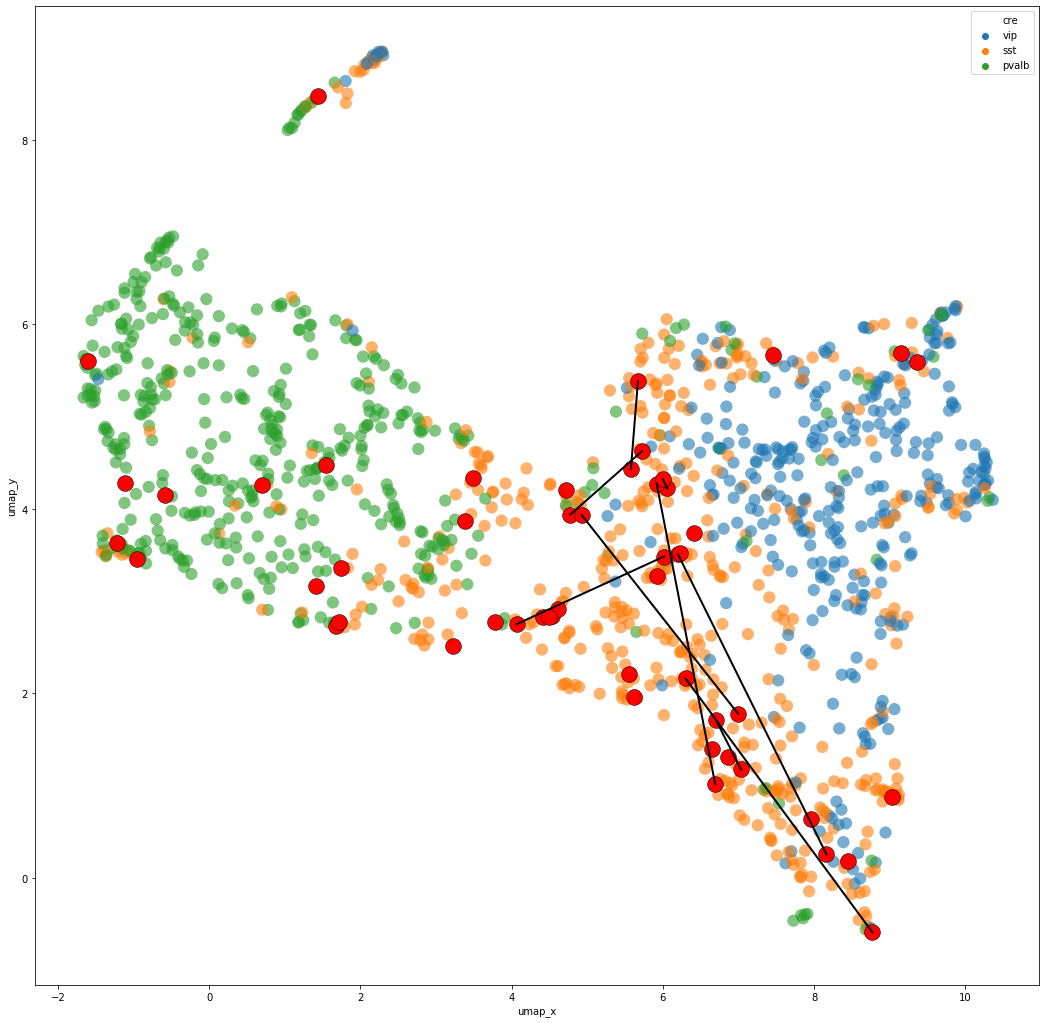

In [80]:
subclass_color_dict={'Pvalb': '#55a868',
                     'Vip': '#4c72b0',
                     'sst': 'orange',
                     }

plt.figure(figsize=(18,18))
sns.scatterplot(merged_df.umap_x, merged_df.umap_y, hue = merged_df.cre, s=150,alpha=0.6,linewidth=0)
# plt.axvline(threshold)


mpatch_sst = merged_df[~merged_df['cre_type_sst_syn'].isin(['vip', 'pvalb', 'sst'])]
sns.scatterplot(data=mpatch_sst, x="umap_x", y="umap_y", s=250, linewidth=0.5, color='red', 
                legend=False, edgecolor='k')

i=0

for X in listOfXvalues:
    if i < len(listOfXvalues):
        plt.plot(listOfXvalues[i:i+2],listOfYvalues[i:i+2], linewidth=2, color='black')
        i+=2
    
# plt.ylim(12, 13)
# plt.xlim(9, 10)
fname = 'C:\\Users\\timj\\Documents\\aisynphys\\analyses\\figures\\Fig_supplements\\Sst_Sst_umpa.svg'
plt.savefig(fname)